# Density plots

In [1]:
%matplotlib inline
from stemgraphic.num import density_plot
import pandas as pd
import warnings
import scipy.stats as stats
#warnings.filterwarnings("ignore")

As Sherlock Holmes would say "Data! Data! Data!"

We will grab a csv of the Titanic dataset (train.csv - since we want the Survived column, and that's ok because we are not training models here, just looking at data), from R. Bilbro's  Titanic repo:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rebeccabilbro/titanic/master/data/train.csv', index_col='PassengerId')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Nakid, Mr. Sahid",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Let's look at age density for the whole dataset. The default is to plot a density curve estimate (density=True) with the area under the curve filled (density_fill=True) based on 1000 data points (display=1000) and a stem-and-leaf leaf order of 1 (leaf_order=1) which will round or decimate based on the calculated scale.

If you want to use full precision, set display=None and leaf_order=None. This can be expensive, depending on the number of secondary plots and the amount of data.

Let's briefly look at all the options using help:

In [5]:
help(density_plot)

Help on function density_plot in module stemgraphic.graphic:

density_plot(df, var=None, ax=None, bins=None, box=None, density=True, density_fill=True, display=1000, fig_only=True, fit=None, hist=None, hues=None, hue_labels=None, jitter=None, kind=None, leaf_order=1, legend=True, limit_var=False, norm_hist=None, random_state=None, rug=None, scale=None, singular=True, strip=None, swarm=None, title=None, violin=None, x_min=0, x_max=None, y_axis_label=True)
    density_plot.
    
    Various density and distribution plots conveniently packaged into one function. Density plot normally forces
    tails at each end which might go beyond the data. To force min/max to be driven by the data, use limit_var.
    To specify min and max use x_min and x_max instead. Nota Bene: defaults to _decimation_ and _quantization_ mode.
    
    See density_plot notebook for examples of the different combinations of plots.
    
    Why this instead of seaborn:
    
    Stem-and-leaf plots naturally quantize da

As option, since we have a full dataframe, we will specify the variable of interest. We will also limit the variable to min/max, since it doesn't make any sense to look at the curve for impossible ages (i.e., less than zero)

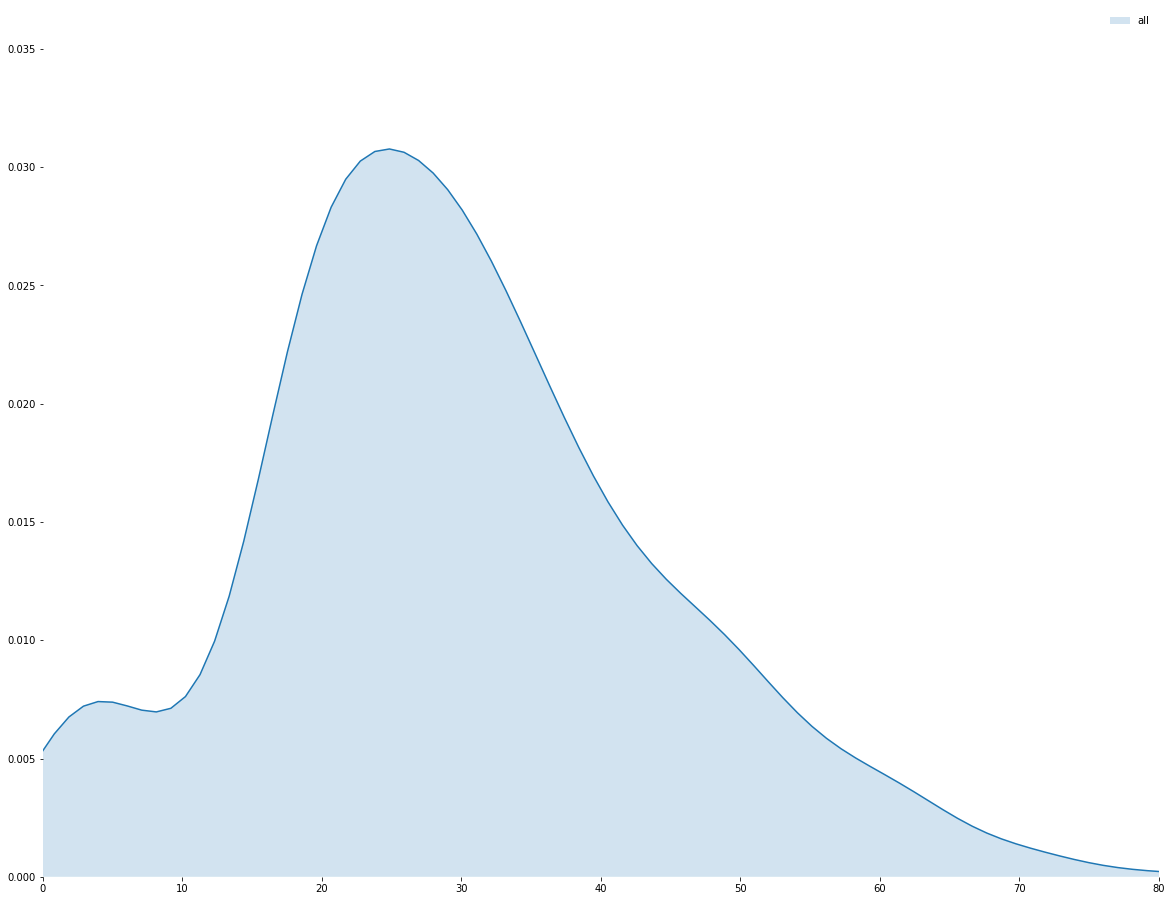

In [6]:
density_plot(df, var='Age', limit_var=True);

We can also combine the density with various combinations of secondary plots. For example, histogram and box plot:

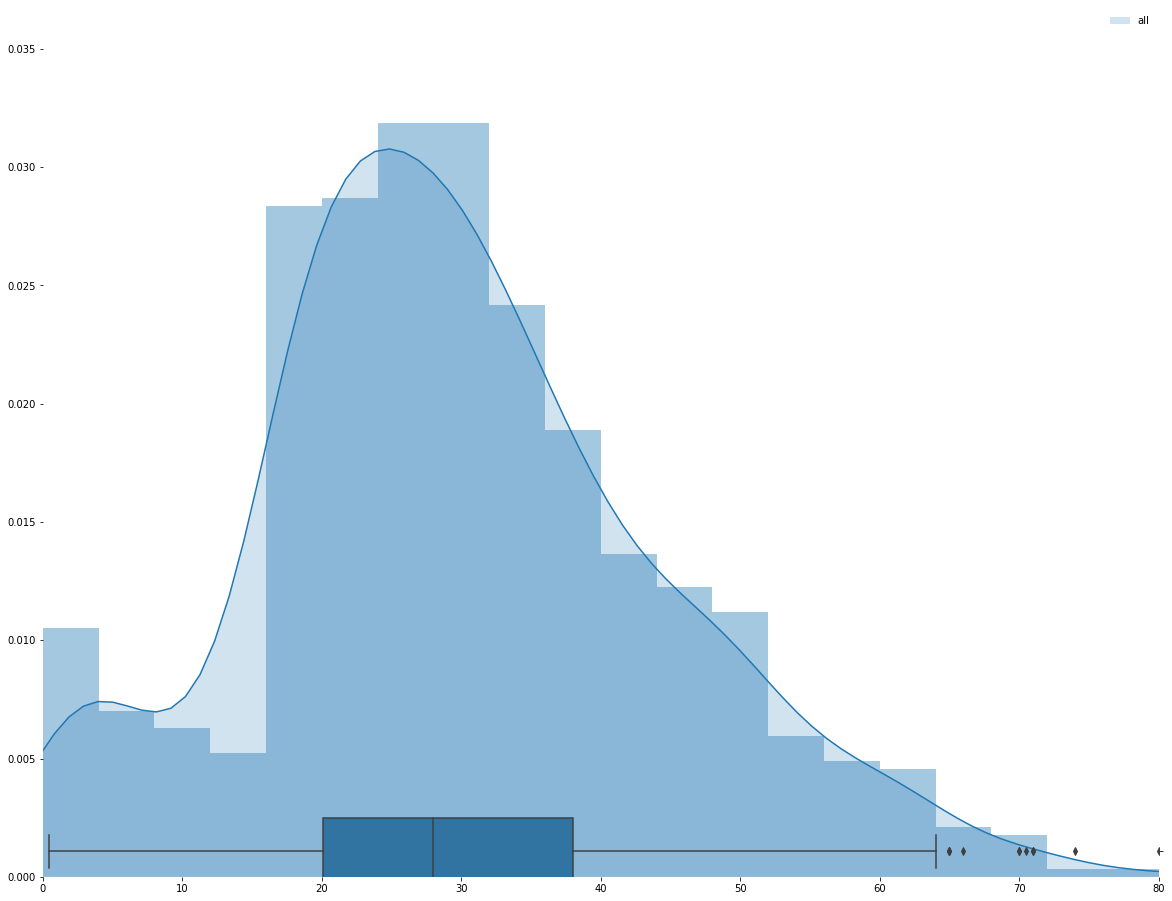

In [7]:
density_plot(df, var='Age', box=True, hist=True, limit_var=True);

Let's look at this where the passengers embarked (Southampton (S), Cherbourg (C) and Queenstown (Q))

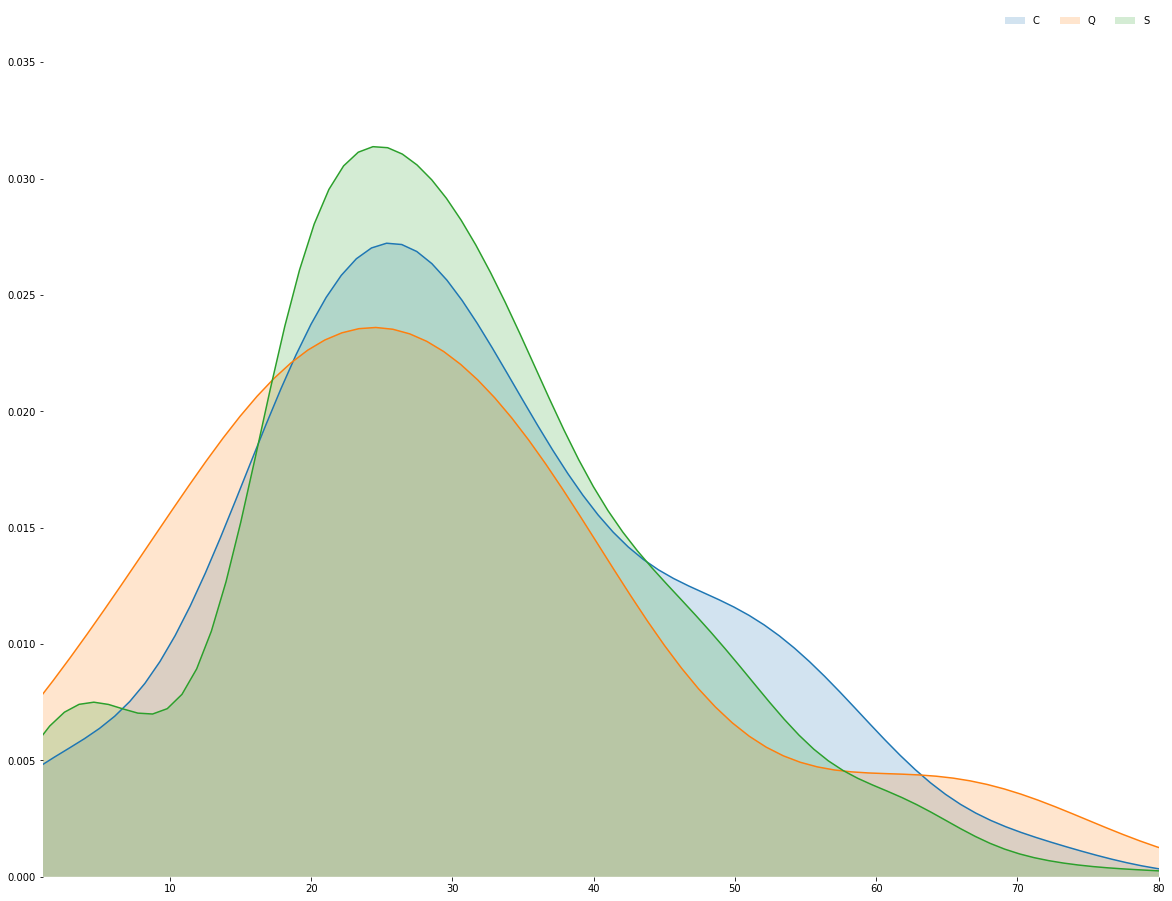

In [8]:
density_plot(df, var='Age', limit_var=True, hues='Embarked');

Wouldn't it be nice to have a legend that is a bit more explanatory than C, Q and S? If we prepare the data some, this is handled automatically by density_plot.

# Categorical support

In [9]:
df2 = df.copy()

In [10]:
# survived indicator
df2.Survived = df2.Survived.astype('category')
df2.Survived.cat.set_categories(['Did not survived', 'survived'], rename=True, inplace=True)

In [11]:
# passenger class
df2.Pclass = df2.Pclass.astype('category')
df2.Pclass.cat.set_categories(['1st', '2nd', '3rd'], rename=True, inplace=True)

In [12]:
# embarked at
df2.Embarked = df2.Embarked.astype('category')
df2.Embarked.cat.set_categories(['Cherbourg', 'Queenstown', 'Southampton'], rename=True, inplace=True)

In [13]:
# sex is already spelled out, so we just need to convert to a category
df2.Sex = df2.Sex.astype('category')

In [14]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,Did not survived,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,survived,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,survived,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,survived,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
5,Did not survived,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


Now we are ready to try our previous plot, but with categoricals. We'll also add a title:

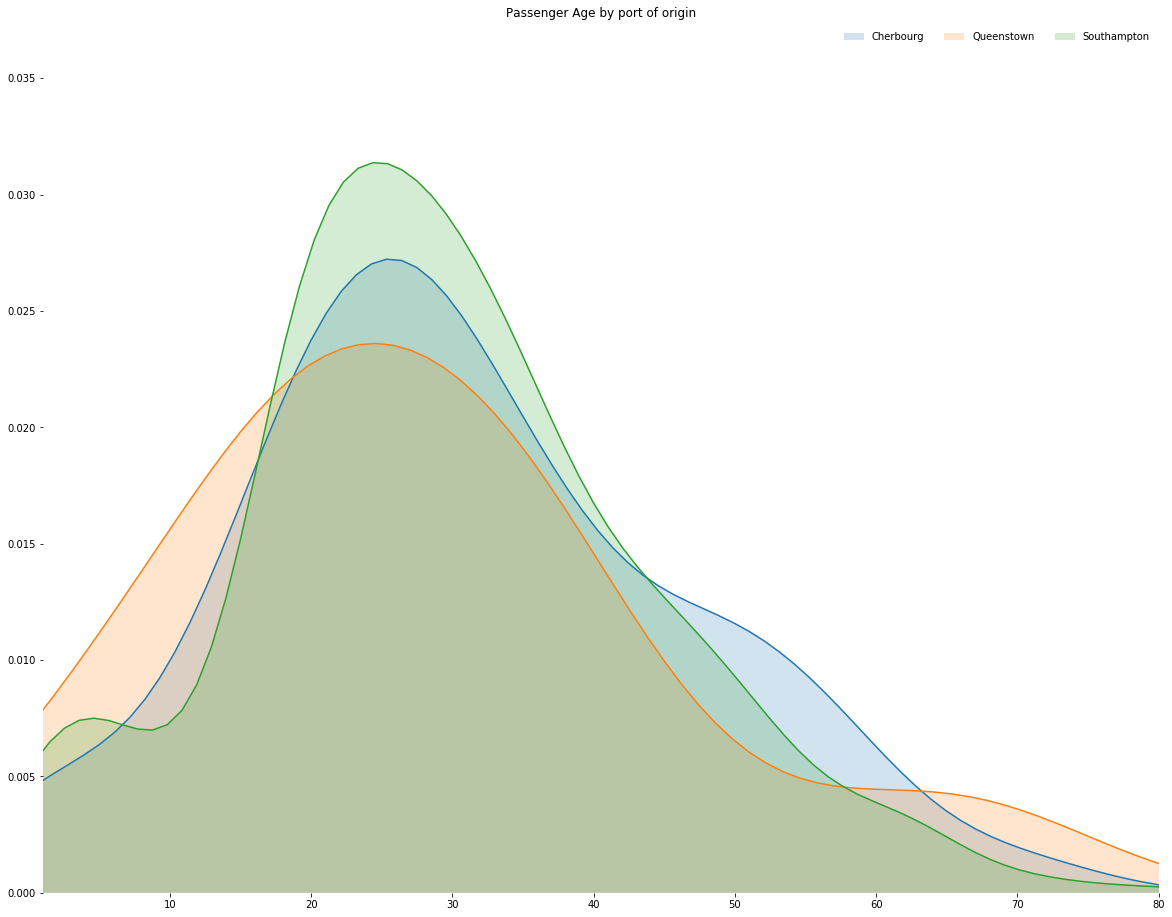

In [15]:
density_plot(df2, var='Age', limit_var=True, hues='Embarked', title='Passenger Age by port of origin');

Let's look at the fare. With money, beside stem-and-leaf plots, box plots are useful to get a better feel of the data. Often pricing will follow a lognormal or a double gamma. Let's check them out.

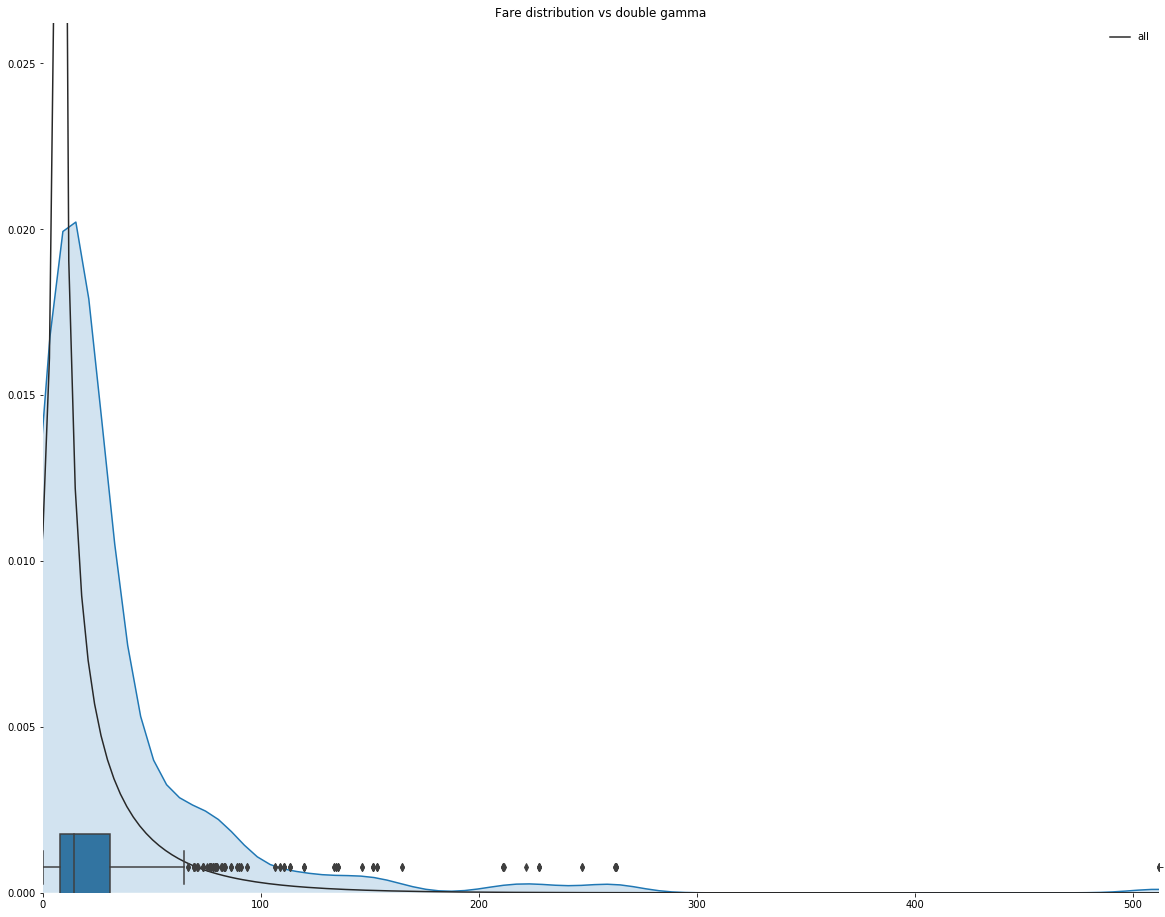

In [16]:
density_plot(df2, var='Fare', box=True, fit=stats.dgamma , limit_var=True, title='Fare distribution vs double gamma');

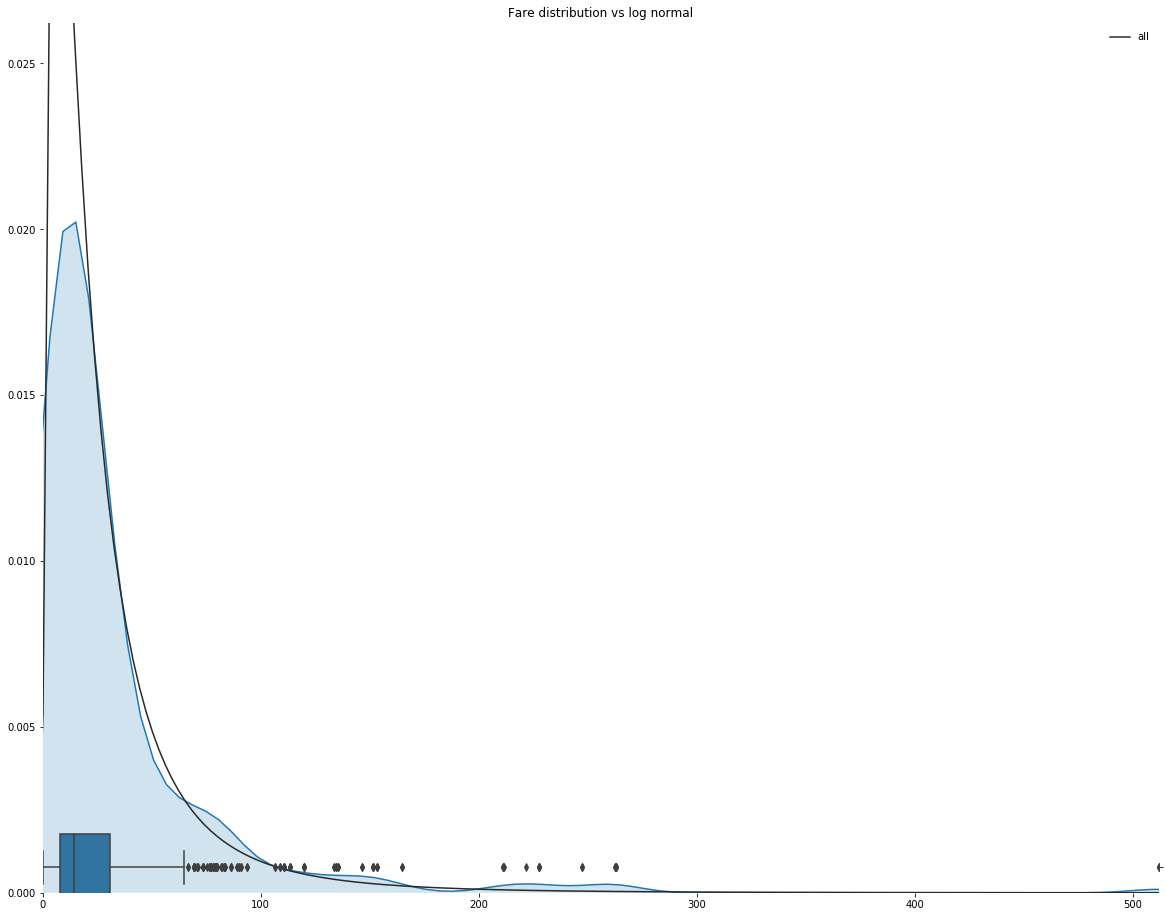

In [17]:
density_plot(df2, var='Fare', box=True, fit=stats.lognorm, limit_var=True, title='Fare distribution vs log normal');

Either would work for a simulation, but it looks like a log normal distribution is a bit closer to reality.

# Other variations

density + histogram + strip plot with jitter

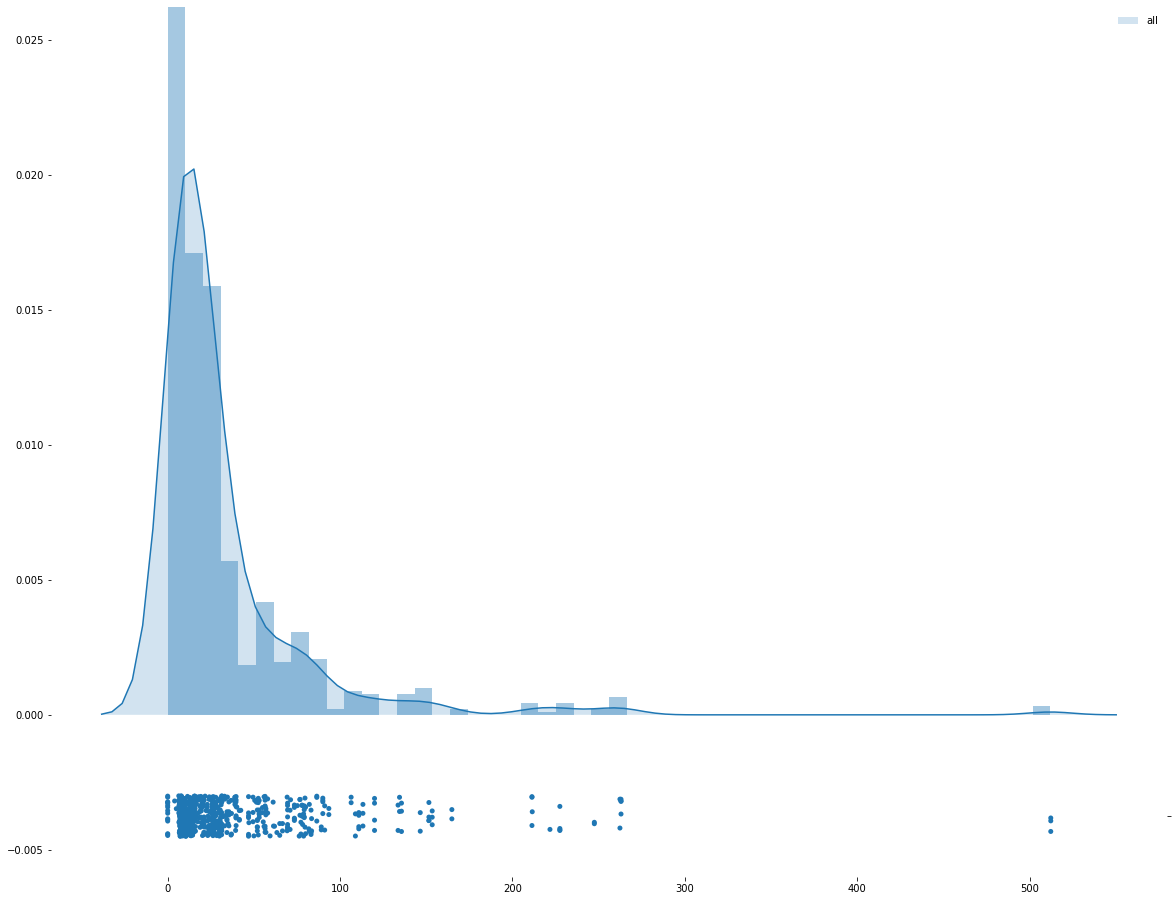

In [18]:
density_plot(df, var='Fare', density=True, hist=True, strip=True, jitter=True);

Multivariate density + hist + boxplot (note the boxplot is for the overall distribution, and in a different color):

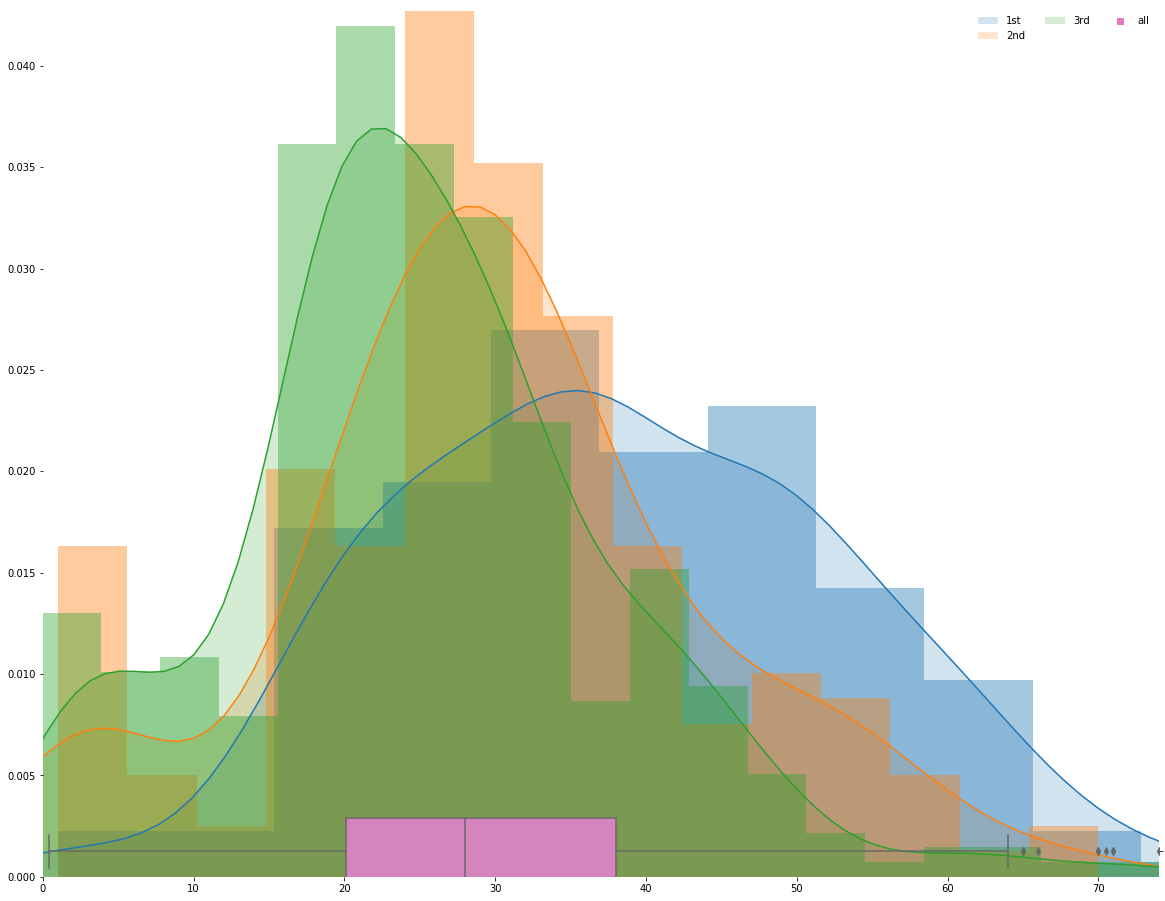

In [19]:
density_plot(df2, var='Age', box=True, hist=True, limit_var=True, hues='Pclass');

Multivariate density + swarm:

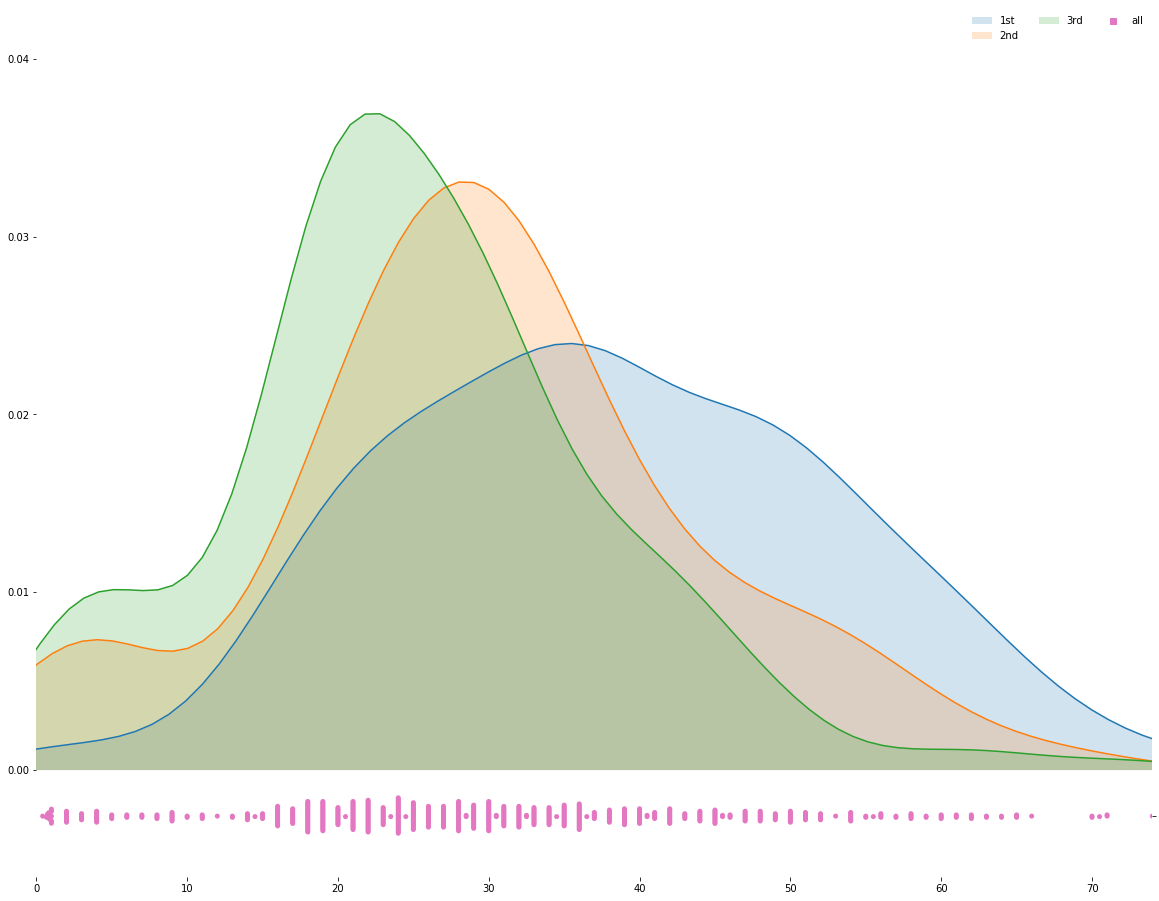

In [20]:
density_plot(df2, var='Age', swarm=True, limit_var=True, hues='Pclass');

Using the kind keyword to combine multiple plot selections as a string:

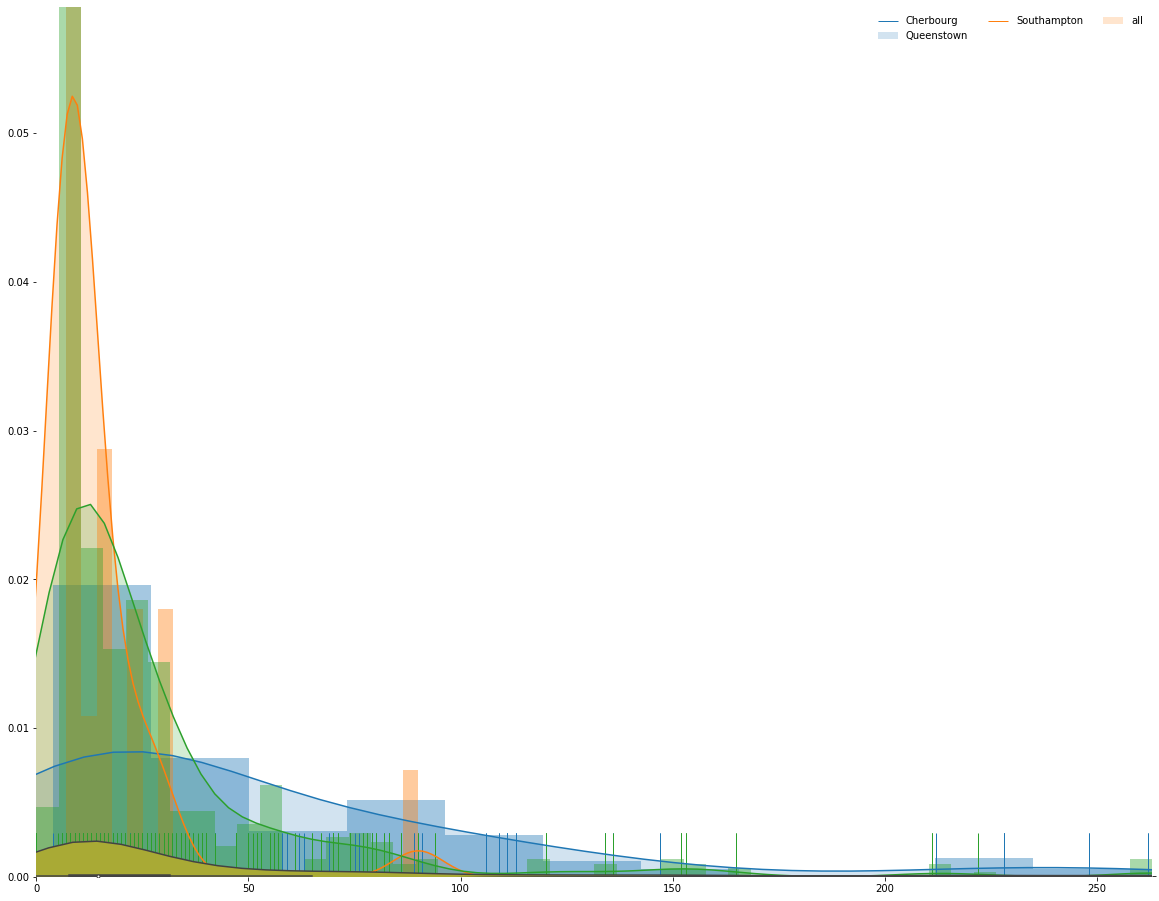

In [21]:
density_plot(df2, var='Fare', kind='hist+rug+violin', limit_var=True, hues='Embarked');

Quick loop of fare paid per port of origin, with passenger class as hue:

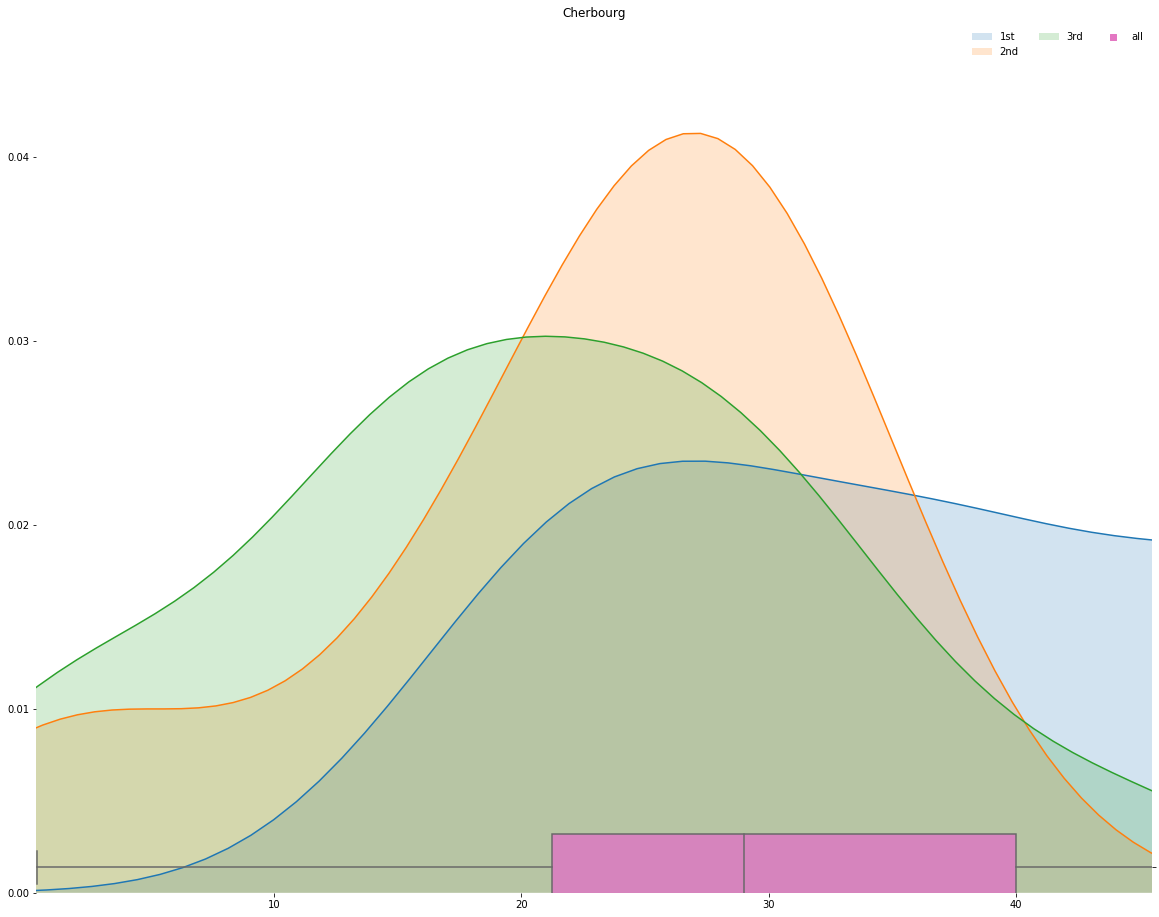

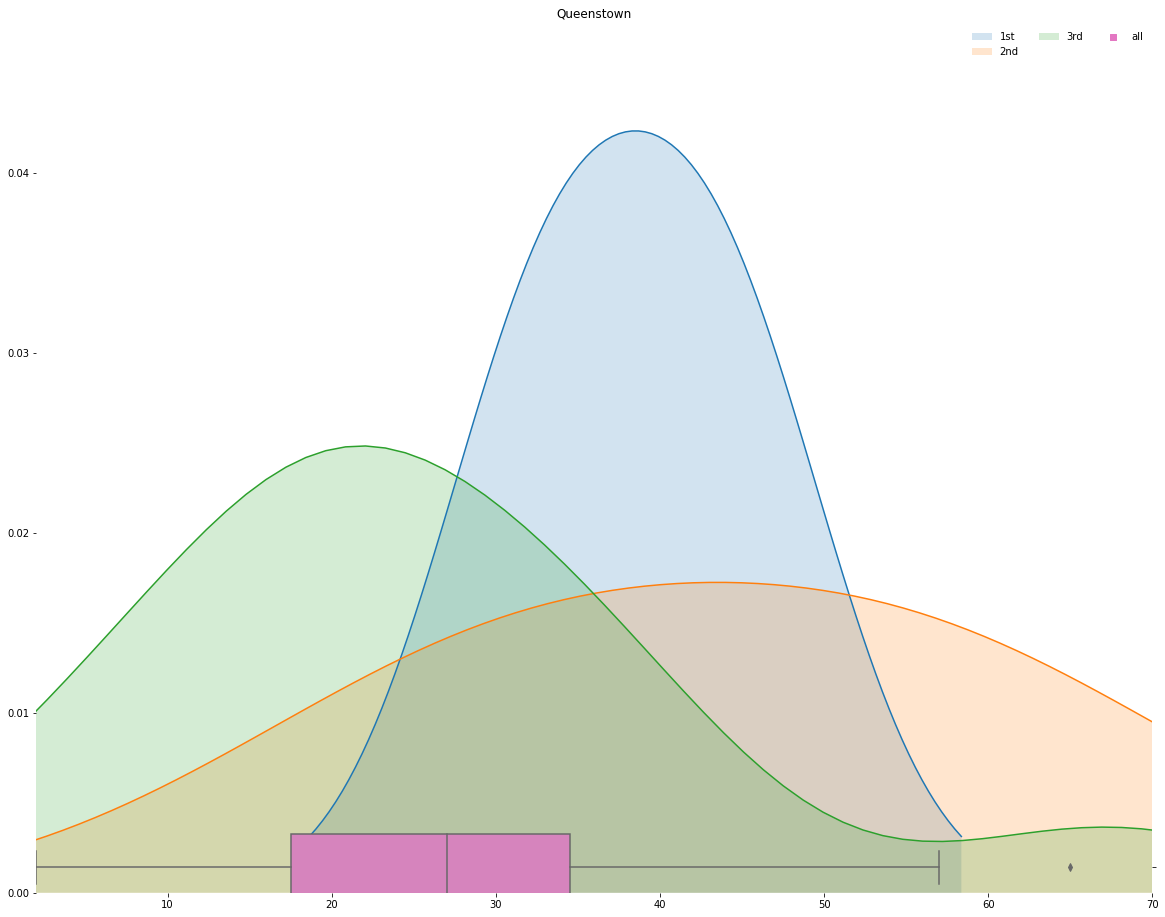

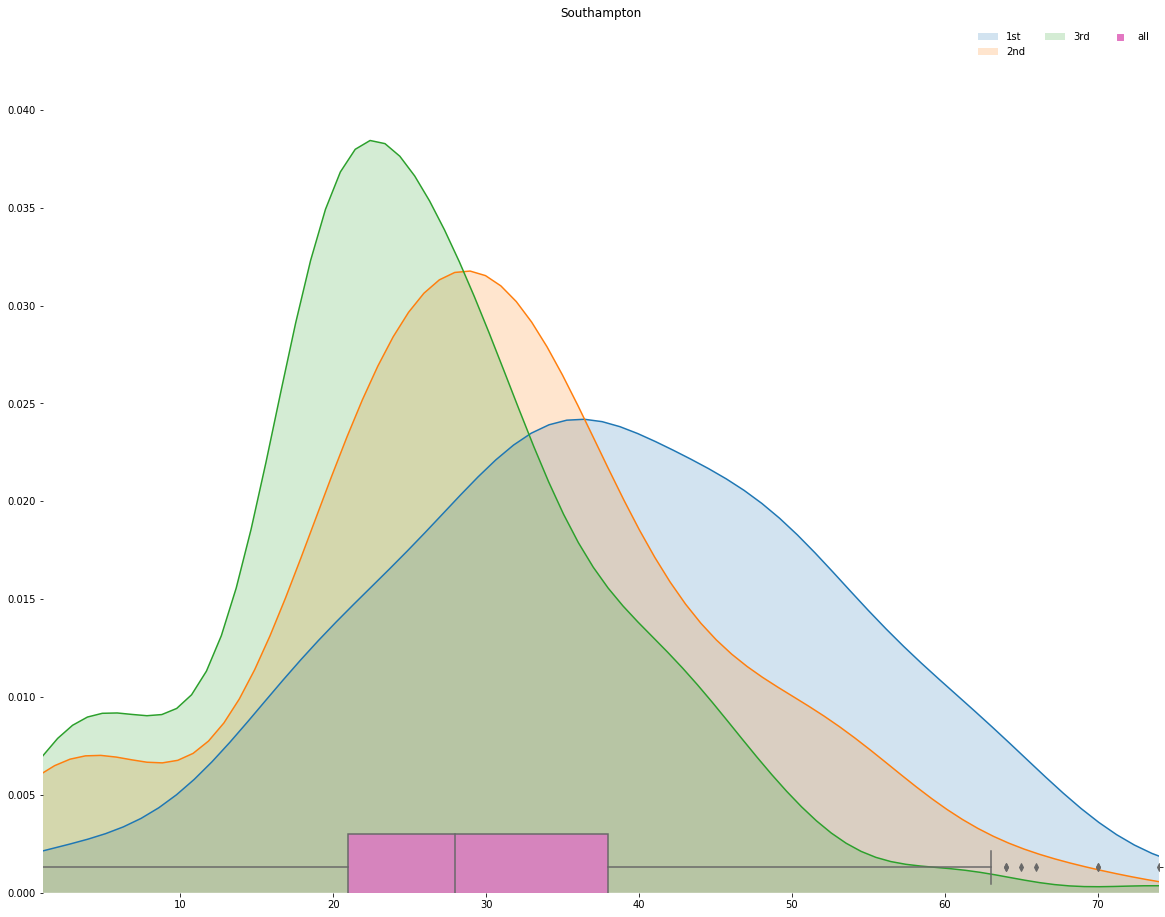

In [22]:
for port in df2.Embarked.cat.categories:
    density_plot(df2[df2.Embarked==port], var='Age', box=True, title=port,
                 limit_var=True, hues='Pclass');